# Data exploration

A key part of Data Science is interactive exploration of your dataset. There are arguably many tools to 

## Data exploration using Pandas

In [42]:
%matplotlib widget
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')
query = 'SELECT * FROM github_events'


df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
df.head()



,repo,type,actor,timestamp
0,cs-jsi/chisel4ml,PushEvent,jurevreca12,2024-02-02 08:05:12.023344
1,Tarzan22/BES-Backend,CreateEvent,Tarzan22,2024-02-02 08:05:12.026647
2,haoqing0110/addon-framework,CreateEvent,haoqing0110,2024-02-02 08:05:12.026703
3,negoxa2020/web_individ,PushEvent,negoxa2020,2024-02-02 08:05:12.026730
4,estevenson9/sketch,PushEvent,estevenson9,2024-02-02 08:05:12.026751


In [43]:
# Check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   repo       13860 non-null  object        
 1   type       13860 non-null  object        
 2   actor      13860 non-null  object        
 3   timestamp  13860 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 433.3+ KB


In [137]:
# Summary statistics of numerical columns
df.describe()

,timestamp
count,11730
mean,2024-01-30 12:37:41.430206720
min,2024-01-30 12:03:24.127240
25%,2024-01-30 12:20:28.558031872
50%,2024-01-30 12:37:41.578468864
75%,2024-01-30 12:54:54.929385216
max,2024-01-30 13:11:56.653242


In [110]:
# Count unique values in categorical columns
df['type'].value_counts()

type
PushEvent                        6644
CreateEvent                       690
PullRequestEvent                  419
IssueCommentEvent                 265
WatchEvent                        232
PullRequestReviewEvent            205
DeleteEvent                       180
IssuesEvent                       113
PullRequestReviewCommentEvent      91
ForkEvent                          81
ReleaseEvent                       35
MemberEvent                        19
PublicEvent                        15
CommitCommentEvent                  6
GollumEvent                         5
Name: count, dtype: int64

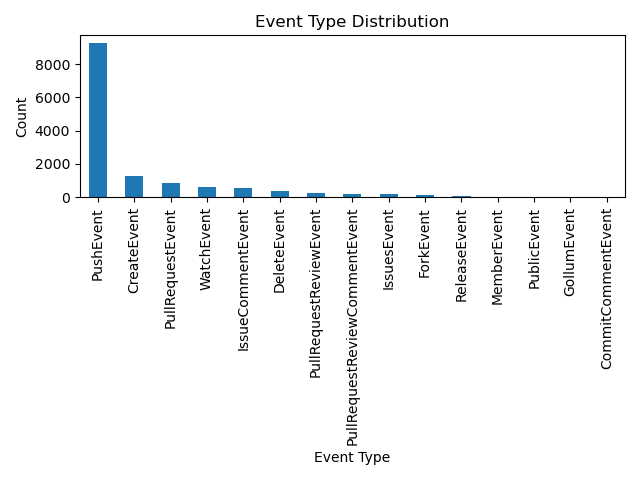

In [44]:
# Plot a bar chart for categorical columns
plt.figure()  # Create another new figure object
df['type'].value_counts().plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Event Type Distribution')
plt.tight_layout()
plt.show()  # Display the plot


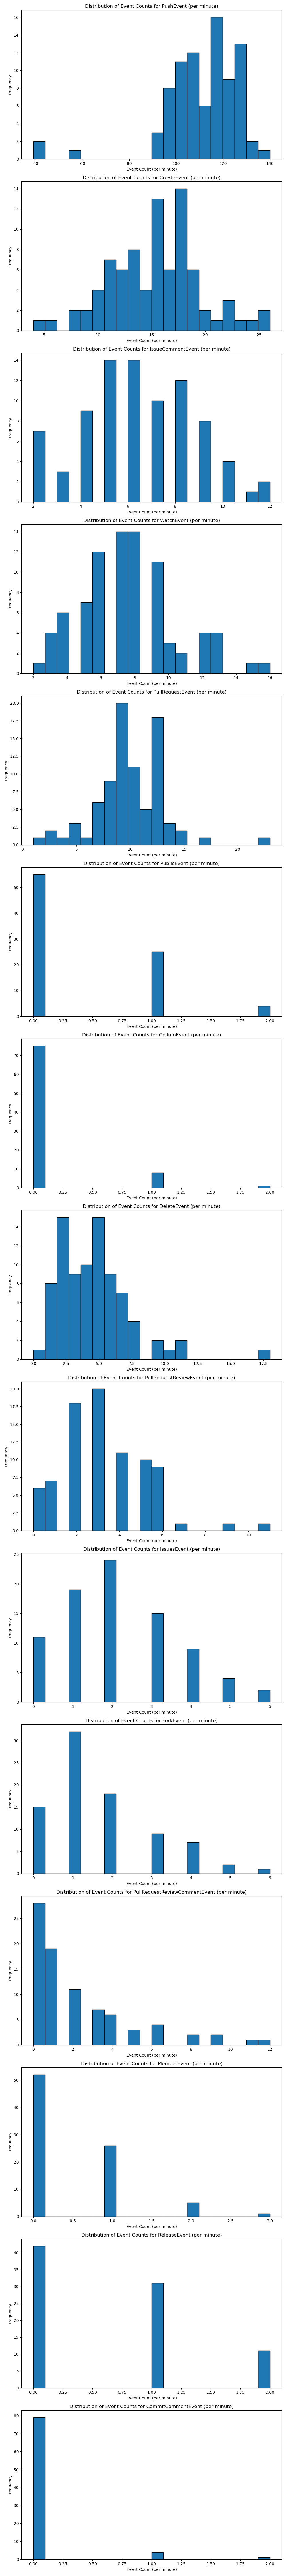

In [45]:
# Group the DataFrame by minute intervals and event types
grouped = df.groupby([pd.Grouper(key='timestamp', freq='1Min'), 'type']).size().unstack(fill_value=0)

# Get unique event types
unique_event_types = df['type'].unique()

# Create subplots for each event type
fig, axes = plt.subplots(nrows=len(unique_event_types), figsize=(10, 6 * len(unique_event_types)))

for i, event_type in enumerate(unique_event_types):
    ax = axes[i]
    
    # Create a histogram for the event count of the current type
    ax.hist(grouped[event_type], bins=20, edgecolor='k')
    ax.set_xlabel('Event Count (per minute)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of Event Counts for {event_type} (per minute)')

plt.tight_layout()
plt.show()


In [3]:
pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 25.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import polars as pl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812,
    'database': 'qdb'
}

# Create a database connection string
connection_str = f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}'

# Create a SQLAlchemy engine
engine = create_engine(connection_str)

# Define your SQL query
query = 'SELECT * FROM github_events'

# Execute the query and fetch data into a pandas DataFrame
df = pd.read_sql(query, engine)

# Convert the pandas DataFrame to a Polars DataFrame
df_polars = pl.DataFrame(df)

# Display the first few rows of the Polars DataFrame
print(df_polars.head())

# Check the schema of the Polars DataFrame
print(df_polars.schema)




shape: (5, 4)
┌─────────────────────────────┬─────────────┬─────────────┬────────────────────────────┐
│ repo                        ┆ type        ┆ actor       ┆ timestamp                  │
│ ---                         ┆ ---         ┆ ---         ┆ ---                        │
│ str                         ┆ str         ┆ str         ┆ datetime[ns]               │
╞═════════════════════════════╪═════════════╪═════════════╪════════════════════════════╡
│ cs-jsi/chisel4ml            ┆ PushEvent   ┆ jurevreca12 ┆ 2024-02-02 08:05:12.023344 │
│ Tarzan22/BES-Backend        ┆ CreateEvent ┆ Tarzan22    ┆ 2024-02-02 08:05:12.026647 │
│ haoqing0110/addon-framework ┆ CreateEvent ┆ haoqing0110 ┆ 2024-02-02 08:05:12.026703 │
│ negoxa2020/web_individ      ┆ PushEvent   ┆ negoxa2020  ┆ 2024-02-02 08:05:12.026730 │
│ estevenson9/sketch          ┆ PushEvent   ┆ estevenson9 ┆ 2024-02-02 08:05:12.026751 │
└─────────────────────────────┴─────────────┴─────────────┴────────────────────────────┘
Ordered

In [15]:
# Check the data types and null values
df.describe()

,timestamp
count,5160
mean,2024-02-02 08:20:29.363307008
min,2024-02-02 08:05:12.023344
25%,2024-02-02 08:12:57.798562560
50%,2024-02-02 08:20:31.040339456
75%,2024-02-02 08:28:04.566559488
max,2024-02-02 08:35:37.167323


In [38]:
df

,repo,type,actor,timestamp
0,cs-jsi/chisel4ml,PushEvent,jurevreca12,2024-02-02 08:05:12.023344
1,Tarzan22/BES-Backend,CreateEvent,Tarzan22,2024-02-02 08:05:12.026647
2,haoqing0110/addon-framework,CreateEvent,haoqing0110,2024-02-02 08:05:12.026703
3,negoxa2020/web_individ,PushEvent,negoxa2020,2024-02-02 08:05:12.026730
4,estevenson9/sketch,PushEvent,estevenson9,2024-02-02 08:05:12.026751
...,...,...,...,...
5155,235wgdf/repo5,PushEvent,ttgds3asu,2024-02-02 08:35:37.167318
5156,biqute/qtics,DeleteEvent,rodolfocarobene,2024-02-02 08:35:37.167320
5157,Samriddhi-Sardar/Audiobook-for-kids,CreateEvent,Samriddhi-Sardar,2024-02-02 08:35:37.167321
5158,NumtraCG/65bc946c644fb26e5dd63f3720240202-0827...,CreateEvent,NumtraCG,2024-02-02 08:35:37.167322


In [40]:
# Count unique values in categorical columns
event_counts = df.groupby('type').count()
event_counts


,repo,actor,timestamp
type,,,
CommitCommentEvent,1,1,1
CreateEvent,479,479,479
DeleteEvent,168,168,168
ForkEvent,48,48,48
GollumEvent,4,4,4
IssueCommentEvent,199,199,199
IssuesEvent,58,58,58
MemberEvent,17,17,17
PublicEvent,19,19,19


In [41]:
# Count unique values in categorical columns
df.groupby('type').value_counts()

type                repo                                            actor             timestamp                 
CommitCommentEvent  symious/ratis                                   symious           2024-02-02 08:23:46.779590    1
CreateEvent         12deeksha/exp1                                  12deeksha         2024-02-02 08:13:53.388973    1
                    Udaytas/test1                                   Udaytas           2024-02-02 08:33:19.601644    1
                    clalit-genomics/variant_calling_benchmarker     oferisak          2024-02-02 08:19:00.777596    1
                    charlotte-bourny/projet-hackaton-2              charlotte-bourny  2024-02-02 08:20:46.965305    1
                                                                                                                   ..
WatchEvent          CYBER-x-SACHIYA-SL-MD-BOT/CYBER-PANDA-MD.V.0.4  shubhamkukreja12  2024-02-02 08:22:53.949181    1
                    CTradeExchange/free-forex-market-data    

## Exploration using specialized libraries, like Facets


In [12]:
!pip install facets-overview

In [16]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from sqlalchemy import create_engine
import pandas as pd
from IPython.core.display import display, HTML
import base64

# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')
query = 'SELECT * FROM github_events '

# Execute the query and fetch data into a DataFrame
df = pd.read_sql(query, engine)
proto = GenericFeatureStatisticsGenerator().ProtoFromDataFrames([{'name': 'test', 'table': df}])

In [11]:

protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))